#Linear Regression (Logistic Regression)




## A. Problem
permasalahan yang ingin kita pecahkan adalah sebagai berikut:

1. Apakah umur dan gender dari seorang penumpang menentukan dirinya akan selamat ?
2. Apakah harga tiket yang dibeli penumpang akan menentukan dirinya selamat jika kapal mengalami kecelakaan ?

## B. Objective
Apa yang bisa kita selesaikan? Dengan adanya project ini, kita akan melakukan analisis data terhadap data <b>gender</b>, <b>age</b>, <b>parch</b>, <b>fare</b>, <b>survived</b> dan membangun model prediksi apakah seseorang akan selamat jika mengalami kecelakaan kapal.

Maka rumusan permasalahan dapat terselesaikan karena dengan project ini.

1. Akan dibangunnya model prediksi klasifikasi untuk memprediksi seseorang selamat atau tidak dengan feature" yang dimiliki

# C. Cleaning
Pembersihan data sudah dilakukan pada projek sebelumnya.



In [1]:
# Kita akan mengakses datasets titanic melalui komputer kita, sehingga harus di download terlebih dahulu.
# link download: https://drive.google.com/drive/folders/1QSP2R_Rj1S-nx2nSnZ__uoeOtLL_y0C3
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [2]:
# load data dan simpan sebagai dataframe df

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# mengecek ukuran data

df.shape

(891, 12)

In [4]:
# mengecek missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# melihat deskripsi statistik (hitungan, rata-rata, nilai max, nilai min) pada data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [7]:
# mengisi nilai umur
df['Age'] = df[['Age','Pclass']].apply(inpute_age,axis=1)

In [8]:
df.drop('Cabin',axis=1,inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# hot-encoding
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [11]:
train = pd.concat([df,sex,embark],axis=1)
# membuang feature yang tidak dapat digunakan
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

## D. EDA

<ipython-input-12-256a492faf11>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


<Axes: >

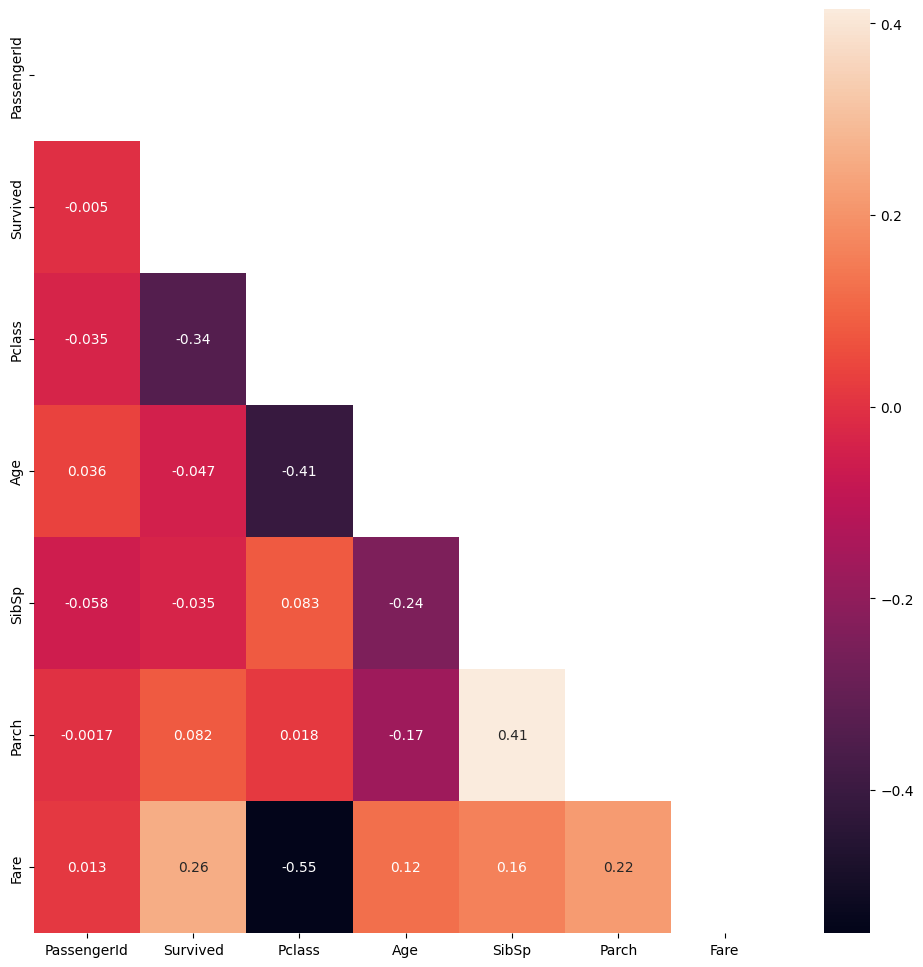

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# hanya memilih nilai korelasi di "upper triangle" -- menghindari duplikasi nilai
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# buat heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, mask = mask)

### Dari heatmap kita dapat melihat.... **Popularity** dan **Loudness (dB)** memiliki nilai korelasi yang tinggi diatas 0,1 yang berarti bahwa semakin tinggi nilai matematika maka tinggi juga nilai writingnya


Text(0.5, 1.0, 'Survive and Age')

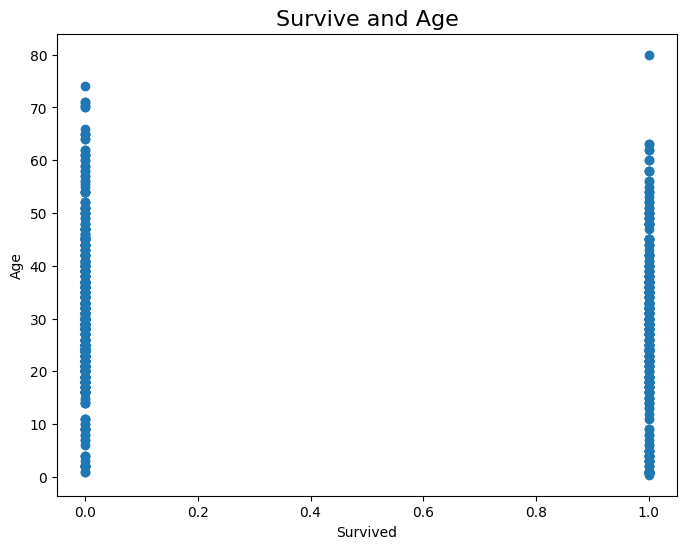

In [13]:
# Persebaran data keduanya.

plt.figure(figsize=(8, 6))
plt.scatter(df['Survived'], df['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Survive and Age", size=16)

Text(0.5, 1.0, 'SibSp and Survived')

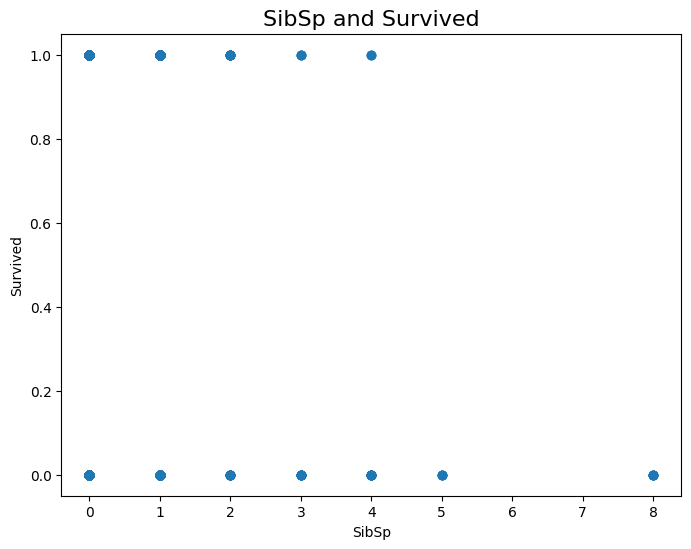

In [14]:
# bagaimana kalau dengan SibSp?
import matplotlib.pyplot as plt

# melihat korelasi
plt.figure(figsize=(8, 6))
plt.scatter(df['SibSp'], df['Survived'])
# memberi judul untuk plot, sumbu x dan sumbu y
plt.xlabel("SibSp")
plt.ylabel("Survived")
plt.title("SibSp and Survived", size=16)

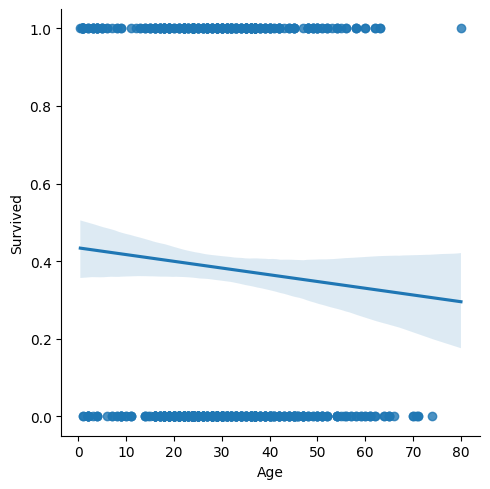

In [15]:
# menampilkan persebaran data danceability dan popularity (scatter plot) dengan tambahan garis linear regression
sns.lmplot(x='Age',y='Survived', data = df)

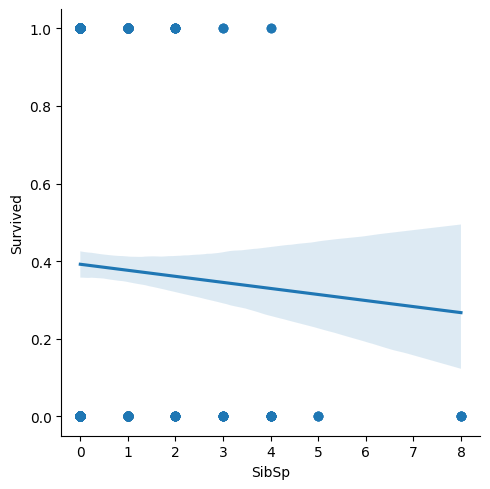

In [16]:
# menampilkan persebaran data writing score dan math score (scatter plot) dengan tambahan garis linear regression
sns.lmplot(x='SibSp',y='Survived', data = df)

## E. Model Building


In [17]:
X= train.drop('Survived',axis=1)
y= train['Survived'] #trying to predict

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()

In [22]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## F. Evaluation

In [23]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
# melihat nilai confusion matrix 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.63      0.70       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 42,  72]])

In [28]:
df_test_set = X_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived,PREDICTED SCORE
331,332,1,45.5,0,0,28.500,1,0,1,0,0
700,701,1,18.0,1,0,227.525,0,0,0,1,1
748,749,1,19.0,1,0,53.100,1,0,1,0,0
751,752,3,6.0,0,1,12.475,1,0,1,1,0
481,482,2,29.0,0,0,0.000,1,0,1,0,0
